In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from warnings import filterwarnings
filterwarnings ('ignore')
import missingno as msno

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# reading the dataset

In [2]:
# we can also read the contents of text file (.txt file)

for line in open('kabaddi_metadata.txt'):

  print(line)

Unnamed: 0: Index column

clock: Time of the event

defender_id: ID of the defender involved in the event

defenders: Number of defenders involved in the event

defending_all_out_points: Points earned for all-out defense

defending_bonus_points: Bonus points earned in defense

defending_capture_points: Points earned for capturing the raider

defending_points: Total points earned in defense

defending_team_id: Team ID of the defending team

defending_technical_points: Technical points earned in defense

do_or_die: Indicator of a do-or-die raid

event: Type of event (e.g., raid, defense)

event_id: Unique identifier for the event

event_no: Sequential number of the event

event_text: Description of the event

match_id: Unique identifier for the match

player_id: ID of the player involved in the event

raid_all_out_points: Points earned for all-out raid

raid_bonus_points: Bonus points earned in raid

raid_points: Total points earned in raid

raid_technical_points: Technical points earned

In [3]:
df_event=pd.read_csv('kabaddi dataset/DS_events.csv')
df_match=pd.read_csv('kabaddi dataset/DS_match.csv')
df_player=pd.read_csv('kabaddi dataset/DS_players.csv')
df_team=pd.read_csv('kabaddi dataset/DS_team.csv')

In [4]:
df_event.head()

,Column1,clock,defender_id,defenders,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,...,review.reason.id,review.reason.reason_value,review.review_taken,review.team_id,score,status_id,substituted_by,super_raid,super_tackle,team_id
0,0,0:33,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[0, 1]",0.0,NaN,NaN,NaN,NaN
1,1,0:43,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,"[0, 1]",0.0,NaN,NaN,NaN,NaN
2,2,0:48,54.0,NaN,NaN,NaN,NaN,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[1, 2]",0.0,NaN,NaN,NaN,NaN
3,3,1:42,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,...,NaN,NaN,NaN,NaN,"[1, 3]",0.0,NaN,NaN,NaN,NaN
4,4,2:19,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[1, 3]",0.0,NaN,NaN,NaN,NaN


In [5]:
middle=len(df_match)//2
middle
df_match.iloc[middle - 2:middle + 2]

342

,Unnamed: 0,match_id,match_number,date,start_time,result,player_id_of_the_match,player_name_of_the_match,series_id,series_name,status,toss_winner,toss_selection,venue_id,venue_name,home_team_id,home_team_name
340,340,315,Match 30,8/16/2017,20:00,Match Tied,219.0,219.0,8,"Pro Kabaddi League Season 5, 2017",Full Time,29,Choice of court :Right,11,"The Arena by Transstadia, Ahmedabad",NaN,NaN
341,341,316,Match 31,8/16/2017,21:00,Gujarat Fortunegiants beat Telugu Titans (29-19),757.0,757.0,8,"Pro Kabaddi League Season 5, 2017",Full Time,31,Choice of court :Left,11,"The Arena by Transstadia, Ahmedabad",31.0,Gujarat Fortunegiants
342,342,317,Match 32,8/17/2017,20:00,Dabang Delhi K.C. beat Tamil Thalaivas (30-29),26.0,26.0,8,"Pro Kabaddi League Season 5, 2017",Full Time,2,Choice of court :Left,11,"The Arena by Transstadia, Ahmedabad",NaN,NaN
343,343,318,Match 33,8/17/2017,21:00,Match Tied,757.0,757.0,8,"Pro Kabaddi League Season 5, 2017",Full Time,31,Choice of court :Left,11,"The Arena by Transstadia, Ahmedabad",31.0,Gujarat Fortunegiants


In [6]:
df_player.iloc[::10]

,Unnamed: 0,index,player_id,player_name,player_short_name,player_skill,player_role,player_red_card,player_yellow_card,player_green_card,...,player_tackle_points_capture_bonus,player_raids_total,player_raids_successful,player_raids_unsuccessful,player_raids_Empty,player_tackles_total,player_tackles_successful,player_tackles_unsuccessful,match_id,team_id
0,0,0,15,Sanjay Shrestha,Sanjay Shrestha,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,1,3
10,0,0,86,Rajesh Narwal,Rajesh Narwal,NaN,NaN,False,False,False,...,0,9,2,2,5,5,2,3,1,3
20,0,0,94,Rishank Devadiga,Rishank Devadiga,NaN,NaN,False,False,False,...,0,9,4,1,4,5,1,4,1,5
30,0,0,47,Haresh Jalmi,Haresh Jalmi,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,10,2
40,0,0,66,Mahesh Goud,Mahesh Goud,NaN,NaN,False,False,False,...,1,13,4,2,6,8,2,6,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,0,161,Girish Maruti Ernak,NaN,NaN,NaN,False,False,False,...,0,0,0,0,0,7,2,5,98,6
16860,0,0,26,Ajay Thakur,NaN,NaN,NaN,False,False,False,...,0,9,2,4,3,1,0,1,98,1
16870,0,0,54,Jeeva Kumar,NaN,NaN,NaN,False,False,False,...,0,0,0,0,0,4,2,2,99,5
16880,0,0,163,Mahendra Ganesh Rajput,NaN,NaN,NaN,False,False,False,...,0,13,2,3,8,0,0,0,99,4


In [7]:
df_team.tail(2)

,Unnamed: 0,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,...,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
1366,0,5,99,U Mumba,31,MUM,"[{'id': 34, 'name': 'Bhupender Singh', 'short_...",NaN,NaN,NaN,...,31,21,15,NaN,41,5,8,NaN,16,8
1367,1,4,99,Bengal Warriors,17,KOL,"[{'id': 163, 'name': 'Mahendra Ganesh Rajput',...",NaN,NaN,NaN,...,17,23,7,NaN,41,11,5,NaN,20,15


In [8]:
print(f'event : {df_event.columns}')
print('\n')
print(f'match : {df_match.columns}')
print('\n')
print(f'player : {df_player.columns}')
print('\n')
print(f'team : {df_team.columns}')

event : Index(['Column1', 'clock', 'defender_id', 'defenders',
       'defending_all_out_points', 'defending_bonus_points',
       'defending_capture_points', 'defending_points', 'defending_team_id',
       'defending_technical_points', 'do_or_die', 'event', 'event_id',
       'event_no', 'event_text', 'match_id', 'player_id',
       'raid_all_out_points', 'raid_bonus_points', 'raid_points',
       'raid_technical_points', 'raid_touch_points', 'raider_bonus',
       'raider_id', 'raiding_team_id', 'reason', 'reason_id', 'review.outcome',
       'review.outcome.id', 'review.outcome.outcome_value', 'review.reason',
       'review.reason.id', 'review.reason.reason_value', 'review.review_taken',
       'review.team_id', 'score', 'status_id', 'substituted_by', 'super_raid',
       'super_tackle', 'team_id'],
      dtype='object')


match : Index(['Unnamed: 0', 'match_id', 'match_number', 'date', 'start_time',
       'result', 'player_id_of_the_match', 'player_name_of_the_match',
       'ser

In [9]:
print('event dataset')
df_event.info()
print('\n')
print('match dataset')
df_match.info()
print('\n')
print('player dataset')
df_player.info()
print('\n')
print('team dataset')
df_team.info()

event dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66568 entries, 0 to 66567
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Column1                       66568 non-null  int64  
 1   clock                         66568 non-null  object 
 2   defender_id                   14055 non-null  float64
 3   defenders                     0 non-null      float64
 4   defending_all_out_points      19799 non-null  float64
 5   defending_bonus_points        19799 non-null  float64
 6   defending_capture_points      19799 non-null  float64
 7   defending_points              58315 non-null  float64
 8   defending_team_id             58315 non-null  float64
 9   defending_technical_points    19799 non-null  float64
 10  do_or_die                     20297 non-null  object 
 11  event                         66568 non-null  object 
 12  event_id                      66568 non-null  

# info

In [10]:
df_event.isnull().sum()/df_event.shape[0]*100

Column1                           0.000000
clock                             0.000000
defender_id                      78.886252
defenders                       100.000000
defending_all_out_points         70.257481
defending_bonus_points           70.257481
defending_capture_points         70.257481
defending_points                 12.397849
defending_team_id                12.397849
defending_technical_points       70.257481
do_or_die                        69.509374
event                             0.000000
event_id                          0.000000
event_no                          0.000000
event_text                        0.000000
match_id                          0.000000
player_id                        91.826403
raid_all_out_points              70.257481
raid_bonus_points                70.257481
raid_points                      12.397849
raid_technical_points            70.257481
raid_touch_points                70.257481
raider_bonus                     99.251893
raider_id  

In [11]:
df_match.isnull().sum()/df_match.shape[0]*100

Unnamed: 0                   0.000000
match_id                     0.000000
match_number                 0.000000
date                         0.000000
start_time                   0.000000
result                       0.730994
player_id_of_the_match      15.935673
player_name_of_the_match    15.935673
series_id                    0.000000
series_name                  0.000000
status                       0.000000
toss_winner                  0.000000
toss_selection               0.000000
venue_id                     0.000000
venue_name                   0.000000
home_team_id                63.304094
home_team_name              63.304094
dtype: float64

In [12]:
df_player.isnull().sum()/df_player.shape[0]*100

Unnamed: 0                              0.000000
index                                   0.000000
player_id                               0.000000
player_name                             0.000000
player_short_name                      89.947904
player_skill                          100.000000
player_role                           100.000000
player_red_card                         0.000000
player_yellow_card                      0.000000
player_green_card                       0.000000
player_jersey                           0.000000
player_played                           0.000000
player_captain                          0.000000
player_on_court                         0.000000
player_on_starter                       0.000000
player_total_points                     0.000000
player_raid_points_total                0.000000
player_raid_points_touch                0.000000
player_raid_points_raid_bonus           0.000000
player_tackle_points_total              0.000000
player_tackle_points

In [13]:
df_team.isnull().sum()/df_team.shape[0]*100

Unnamed: 0                                    0.000000
id                                            0.000000
match_id                                      0.000000
name                                          0.000000
score                                         0.000000
short_name                                    0.000000
squad                                         0.000000
state_of_play                               100.000000
state_of_play.is_raiding_now                 56.432749
state_of_play.last_raid.id                   56.432749
state_of_play.last_raid.result               65.350877
state_of_play.players                        56.432749
state_of_play.players_on_court               56.432749
stats.all_outs                                0.000000
stats.declare                                 0.000000
stats.points.all_out                          0.000000
stats.points.declare                          0.000000
stats.points.extras                           0.000000
stats.poin

# printing all the columns which has 100% missing values

In [14]:
eventnull=df_event.columns[df_event.isnull().mean()==1].tolist()
print(f'event dataset : {eventnull}')

matchnull=df_match.columns[df_match.isnull().mean()==1].tolist()
print(f'match dataset : {matchnull}')

playernull=df_player.columns[df_player.isnull().mean()==1].tolist()
print(f'player dataset : {playernull}')

teamnull=df_team.columns[df_team.isnull().mean()==1].tolist()
print(f'team dataset : {teamnull}')

event dataset : ['defenders', 'reason_id', 'review.outcome', 'review.reason']
match dataset : []
player dataset : ['player_skill', 'player_role']
team dataset : ['state_of_play']


# finding columns which has more than or equal to 75% missing values

In [15]:
for x in [df_event,df_match,df_player,df_team]:
    x.columns[x.isnull().mean()>=0.75].tolist()

['defender_id',
 'defenders',
 'player_id',
 'raider_bonus',
 'reason',
 'reason_id',
 'review.outcome',
 'review.outcome.id',
 'review.outcome.outcome_value',
 'review.reason',
 'review.reason.id',
 'review.reason.reason_value',
 'substituted_by',
 'team_id']

[]

['player_short_name', 'player_skill', 'player_role']

['state_of_play']

In [16]:
# printing all the columns which has 100% missing values

for x in [df_event,df_match,df_player,df_team]:
    missing=x.columns[x.isnull().mean()==1].tolist()
    print(missing)

['defenders', 'reason_id', 'review.outcome', 'review.reason']
[]
['player_skill', 'player_role']
['state_of_play']


# visualising missing values in the datarame

<Axes: >

<Axes: >

<Axes: >

<Axes: >

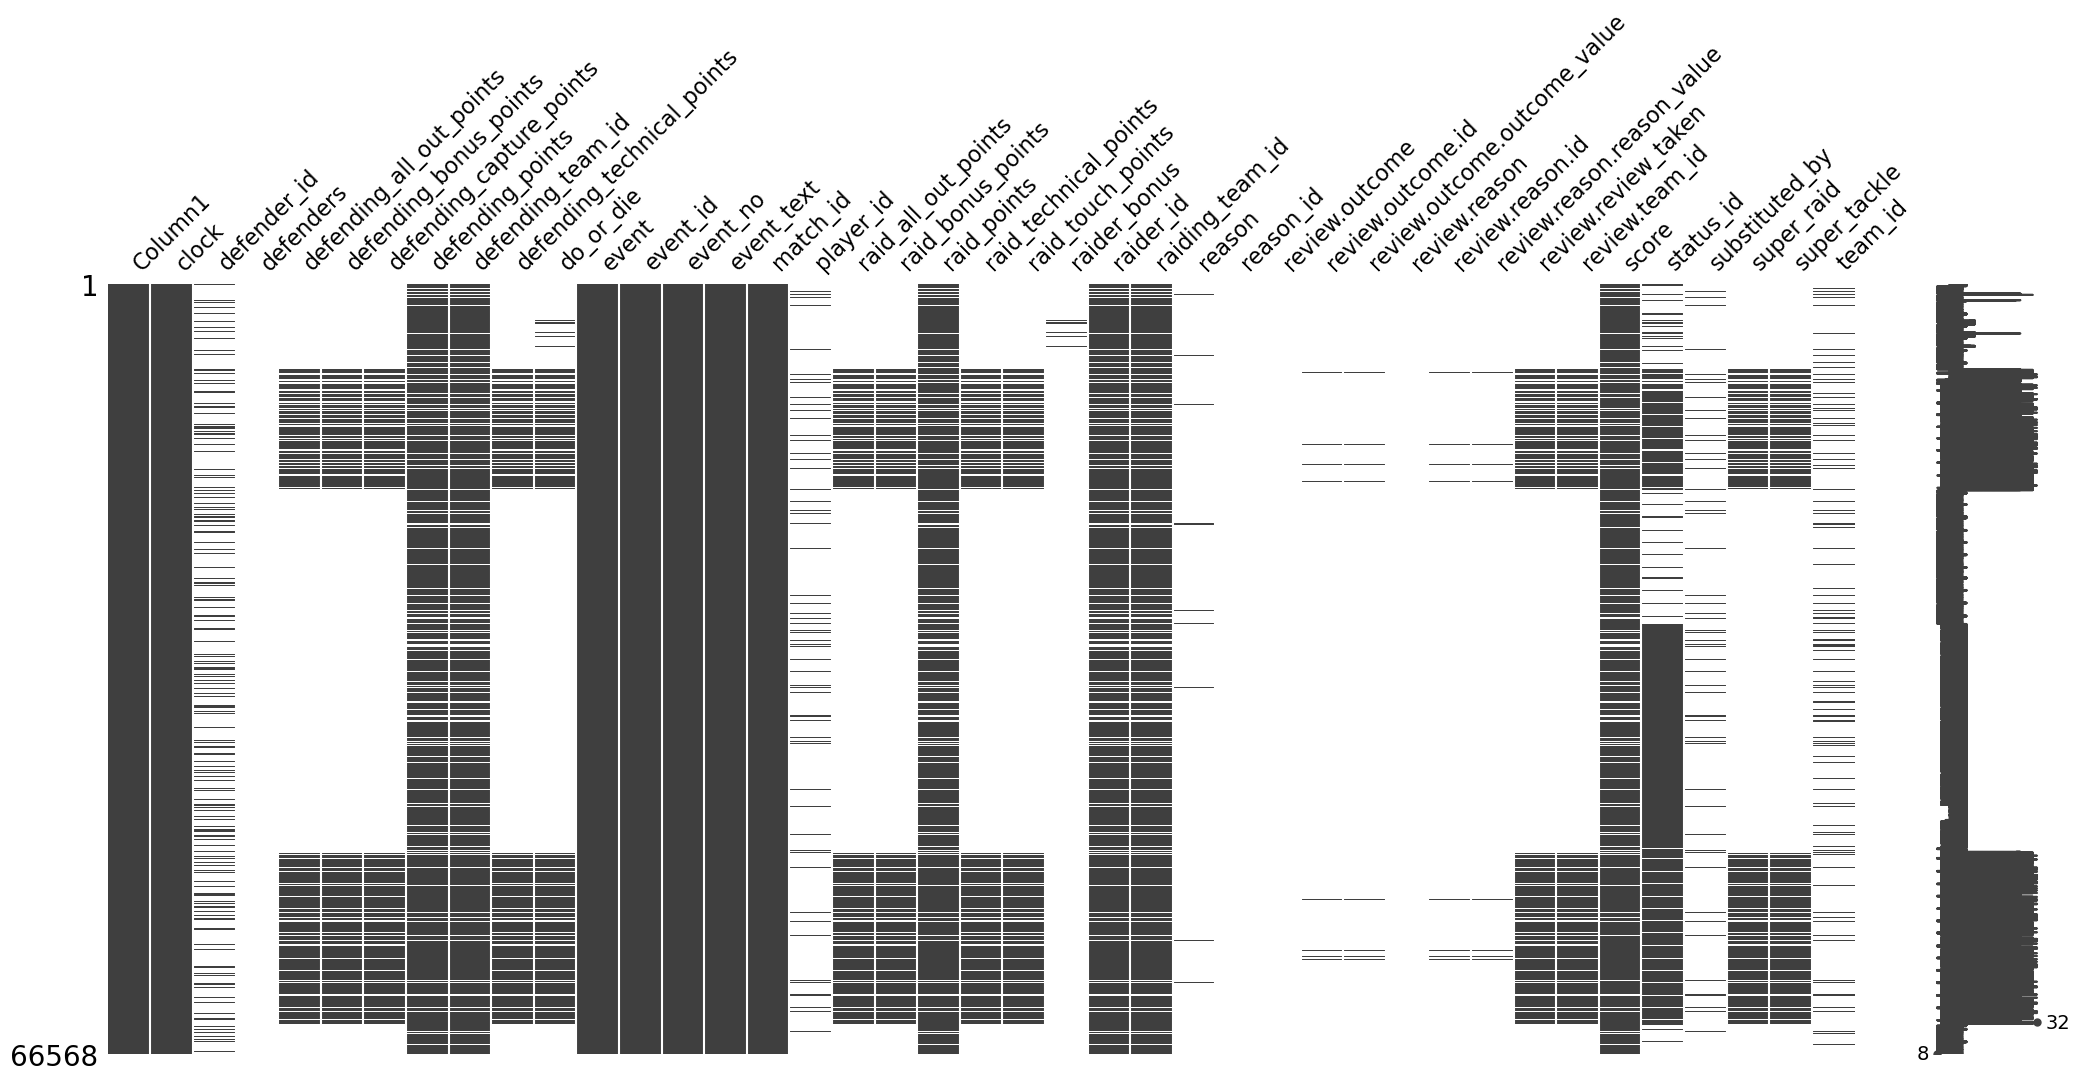

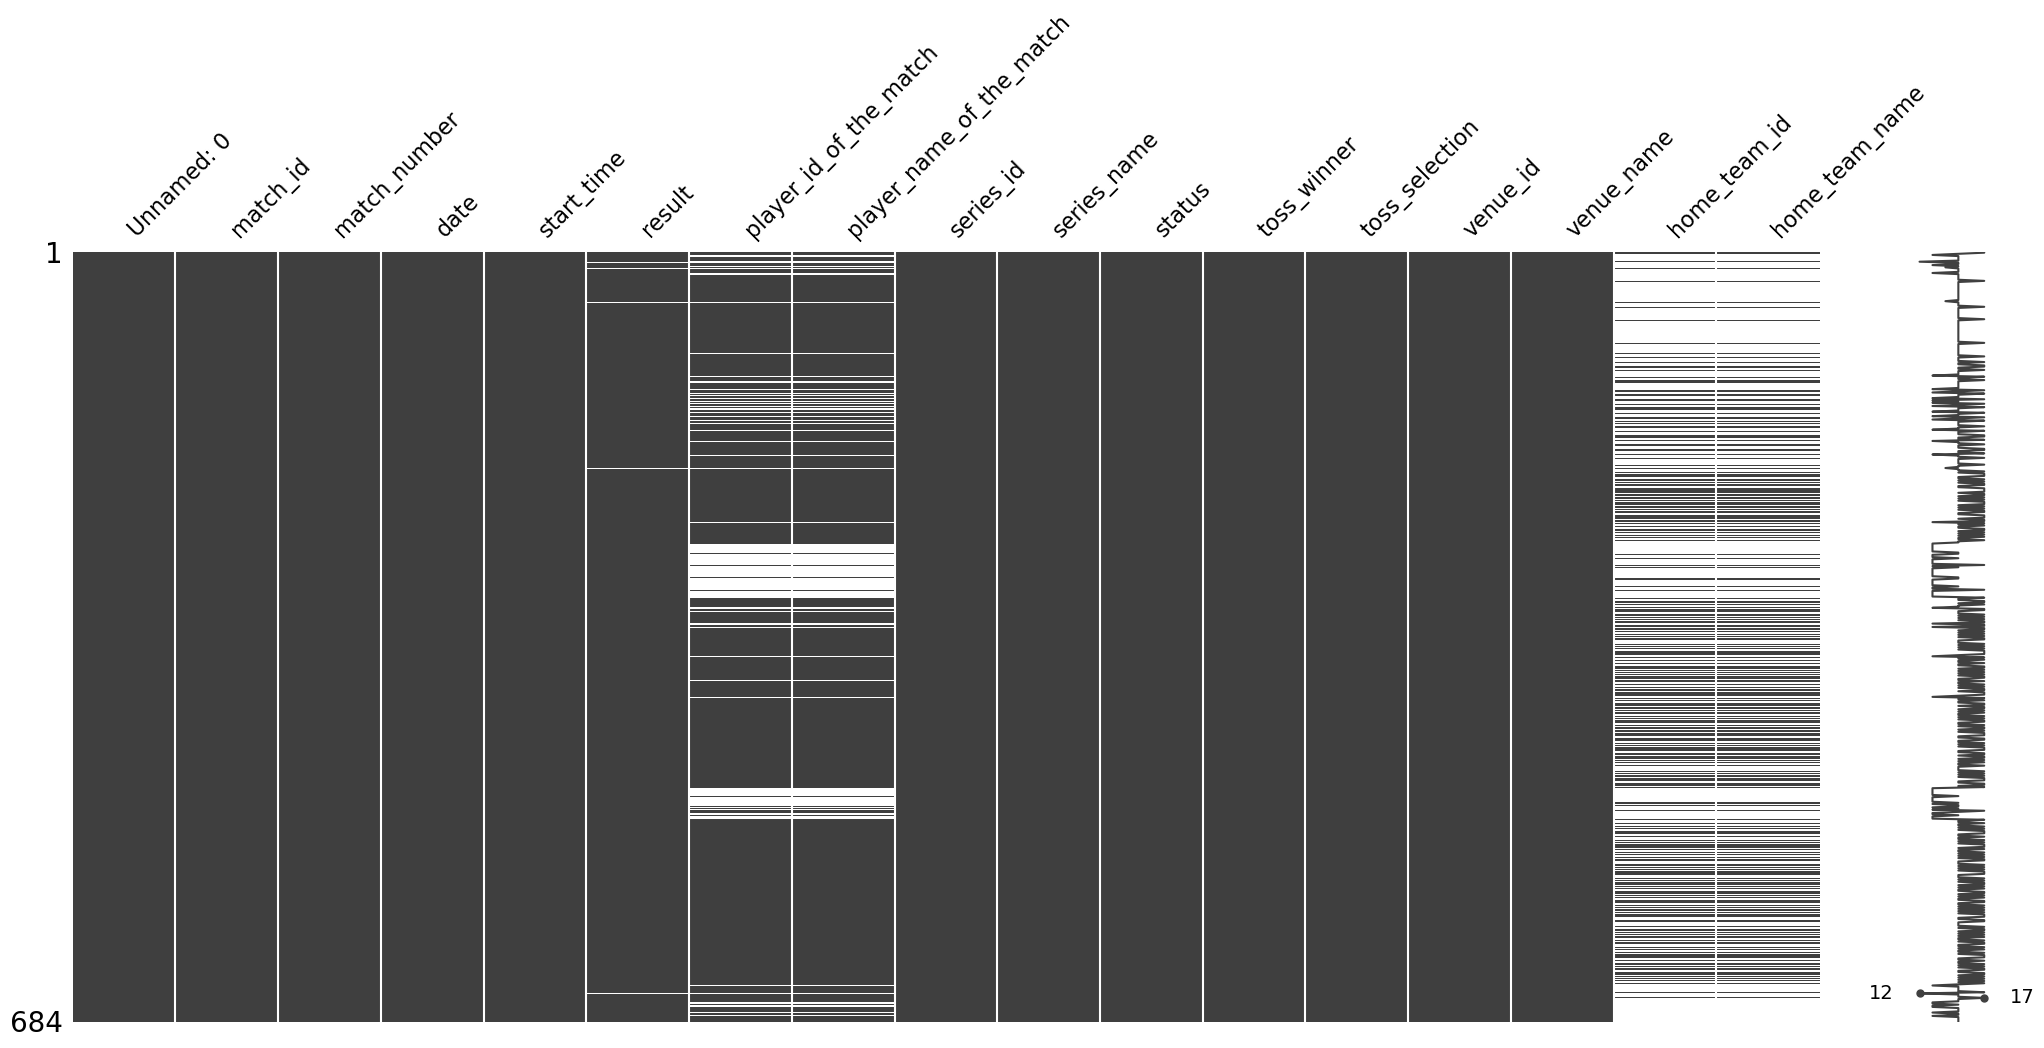

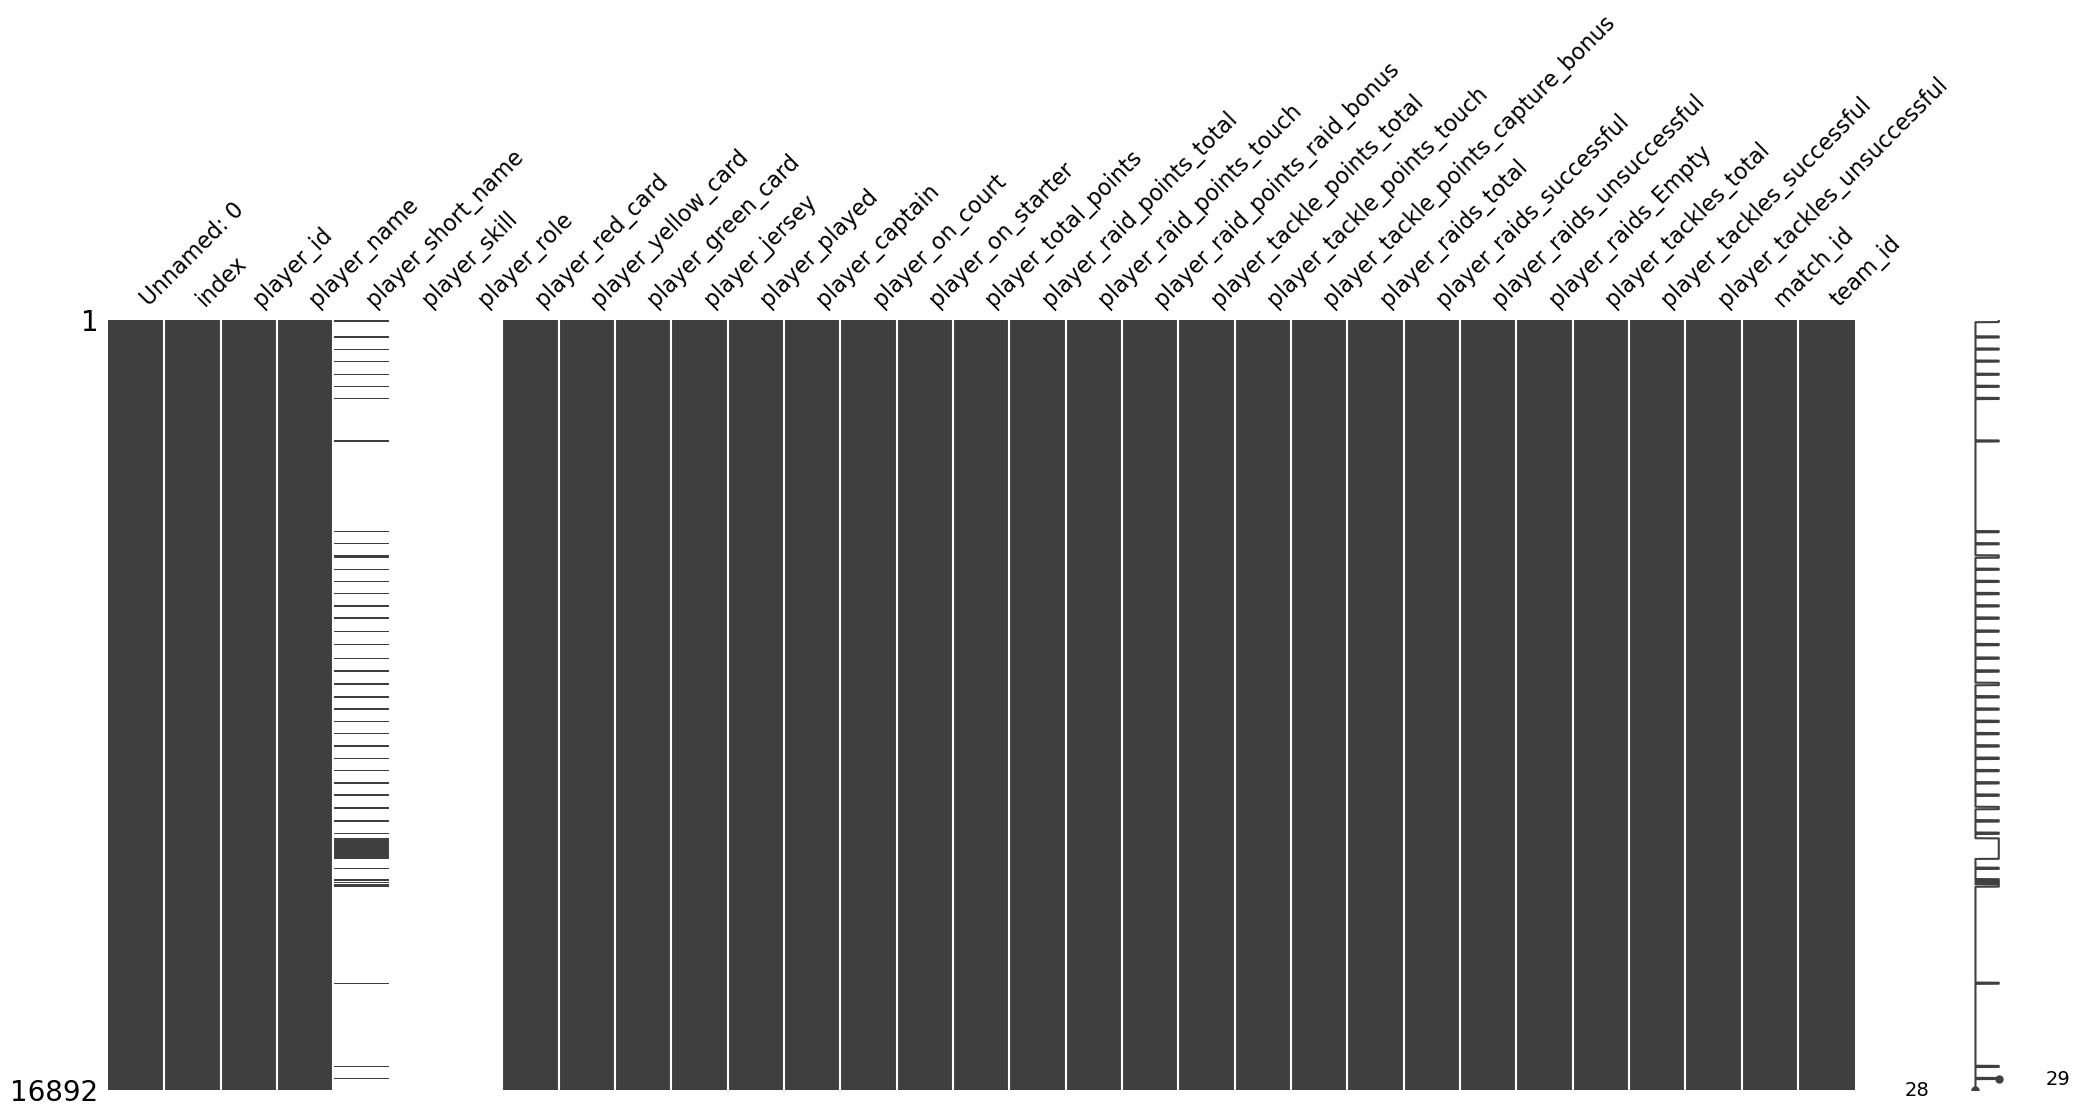

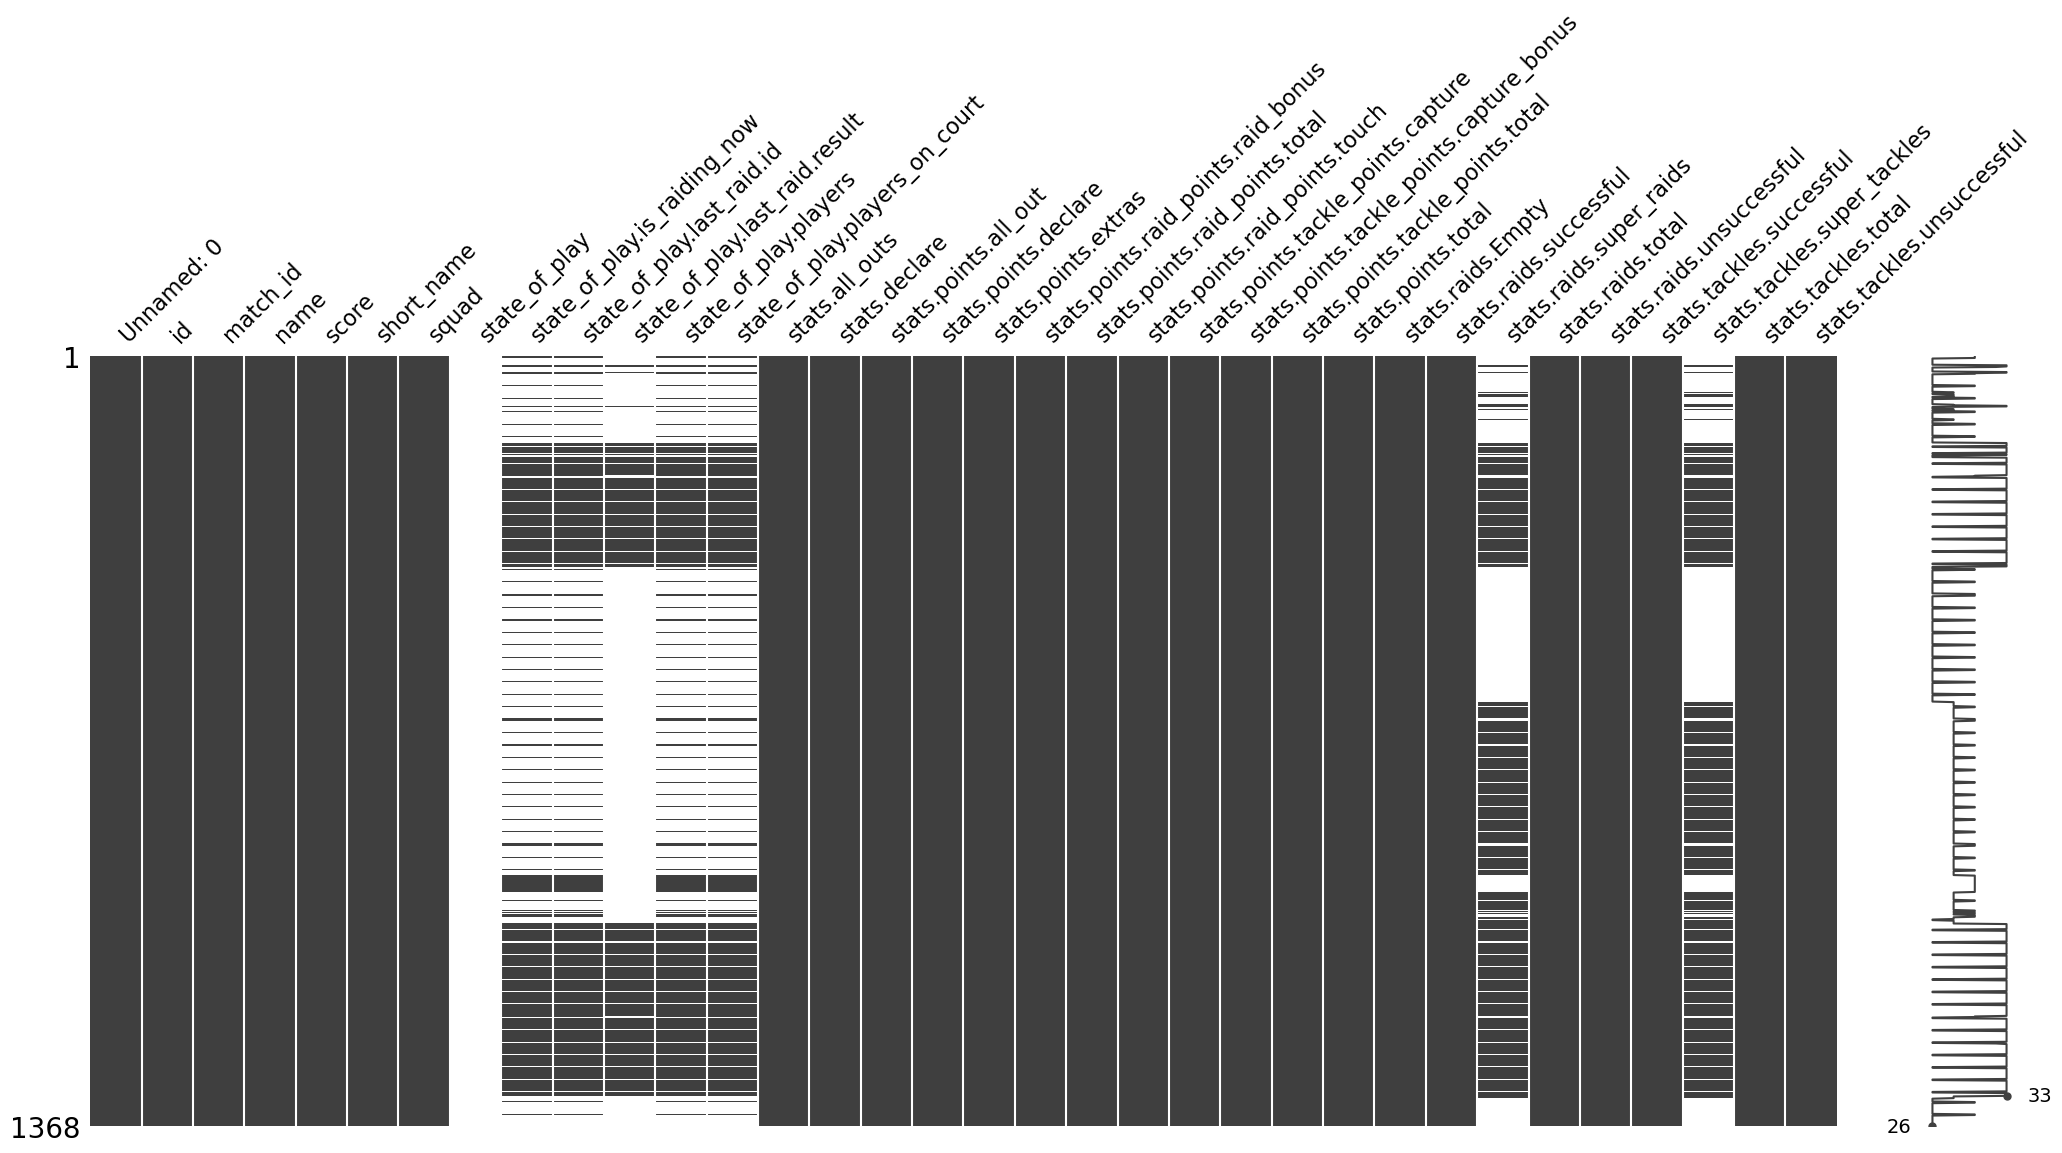

In [17]:
for x in [df_event,df_match,df_player,df_team]:
    msno.matrix(x)

# descriptive statistics of all the dataframe.

In [18]:
for x in [df_event,df_match,df_player,df_team]:
    x.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Column1,66568.0,48.710326,28.798869,0.0,24.0,48.0,73.0,122.0
defender_id,14055.0,386.817645,557.652491,4.0,96.0,179.0,401.0,2672.0
defenders,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defending_all_out_points,19799.0,0.028486,0.236989,0.0,0.0,0.0,0.0,2.0
defending_bonus_points,19799.0,0.021112,0.143762,0.0,0.0,0.0,0.0,1.0
defending_capture_points,19799.0,0.218950,0.413545,0.0,0.0,0.0,0.0,1.0
defending_points,58315.0,0.271885,0.563008,0.0,0.0,0.0,0.0,3.0
defending_team_id,58315.0,14.574415,31.458682,1.0,3.0,6.0,16.0,243.0
defending_technical_points,19799.0,0.016617,0.139547,0.0,0.0,0.0,0.0,2.0
event_id,66568.0,2.607199,1.714135,1.0,1.0,2.0,3.0,11.0


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,684.0,341.500000,197.598077,0.0,170.75,341.5,512.25,683.0
match_id,684.0,540.064327,528.370319,1.0,172.75,343.5,693.25,1771.0
player_id_of_the_match,575.0,367.553043,604.592246,12.0,80.00,143.0,320.00,2661.0
player_name_of_the_match,575.0,367.553043,604.592246,12.0,80.00,143.0,320.00,2661.0
series_id,684.0,16.195906,16.316047,1.0,3.00,8.0,26.00,51.0
toss_winner,684.0,14.500000,31.129423,1.0,3.00,6.0,17.00,243.0
venue_id,684.0,8.087719,5.767676,0.0,4.00,7.0,11.00,25.0
home_team_id,251.0,11.490040,17.897343,0.0,3.00,6.0,12.00,236.0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,16892.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
index,16892.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
player_id,16892.0,NaN,NaN,NaN,511.530725,700.758957,1.0,111.0,249.0,541.0,2683.0
player_skill,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_role,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_red_card,16892,2,False,16889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_yellow_card,16892,2,False,16877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_green_card,16892,2,False,16484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_jersey,16892.0,NaN,NaN,NaN,23.754677,62.097363,0.0,5.0,10.0,20.0,999.0
player_played,16892,2,True,14673,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1368.0,0.500000,0.500183,0.0,0.00,0.5,1.00,1.0
id,1368.0,14.665205,31.633031,1.0,3.00,6.0,16.00,243.0
match_id,1368.0,540.064327,528.177024,1.0,172.75,343.5,693.25,1771.0
score,1368.0,31.842105,9.108542,2.0,26.00,31.0,36.00,80.0
state_of_play,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_of_play.last_raid.id,596.0,643.365772,871.213488,0.0,41.00,259.0,757.00,2683.0
state_of_play.players_on_court,596.0,4.179530,2.505721,0.0,2.00,5.0,6.00,7.0
stats.all_outs,1368.0,1.178363,1.213337,0.0,0.00,1.0,2.00,8.0
stats.declare,1368.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
stats.points.all_out,1368.0,2.421053,2.188865,0.0,0.00,2.0,4.00,14.0


# checking datatype of all the dataframe

In [19]:
print(f'event dataset: {df_event.dtypes}')
print('\n')
print(f'match dataset: {df_match.dtypes}')
print('\n')
print(f'player dataset: {df_player.dtypes}')
print('\n')
print(f'team dataset: {df_team.dtypes}')

event dataset: Column1                           int64
clock                            object
defender_id                     float64
defenders                       float64
defending_all_out_points        float64
defending_bonus_points          float64
defending_capture_points        float64
defending_points                float64
defending_team_id               float64
defending_technical_points      float64
do_or_die                        object
event                            object
event_id                          int64
event_no                          int64
event_text                       object
match_id                          int64
player_id                       float64
raid_all_out_points             float64
raid_bonus_points               float64
raid_points                     float64
raid_technical_points           float64
raid_touch_points               float64
raider_bonus                    float64
raider_id                       float64
raiding_team_id          

# dropping duplicate values

In [20]:
for x in [df_event,df_match,df_player,df_team]:
    x.duplicated().sum()
    x.drop_duplicates(inplace=True)

# no duplicates in the dataframe

0

0

0

0

# now drop all the irrelevant columns in the dataset
# Drop columns that contain 100% null values

In [21]:
for x in df_event.columns[df_event.isnull().mean()==1]:
    df_event.drop(x,axis=1,inplace=True)

# all the columns have been droped which contain missing values

In [22]:
# another way of droping the columns using for loop

for x in [df_match,df_player,df_team]:
    null=x.columns[x.isnull().mean()==1]
    x.drop(null,axis=1,inplace=True)

In [23]:
for x in [df_event,df_match,df_player,df_team]:
    print(x.shape)

(66568, 37)
(684, 17)
(16892, 29)
(1368, 33)


# printing all the unique values in the columns

In [24]:
for x in df_event.columns:
    print('---------------------------------')
    print(x)
    df_event[x].unique()

---------------------------------
Column1


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122], dtype=int64)

---------------------------------
clock


array(['0:33', '0:43', '0:48', ..., '8:33', '22:4', '33:5'], dtype=object)

---------------------------------
defender_id


array([  nan,   54.,  147.,   96.,  123.,  144.,  146.,   29.,   72.,
         86.,  143.,  105.,   71.,   32.,   44.,   52.,   73.,   51.,
          4.,  108.,  107.,   80.,   77.,   75.,  118.,   58.,   28.,
         38.,   98.,   66.,   12.,  157.,  208.,  142.,  158.,   46.,
        161.,  222.,  252.,  160.,  233.,   70.,  240.,  235.,   84.,
        248.,  217.,  239.,   41.,   97.,   42.,  194.,  109.,   69.,
        173.,  246.,  185.,  204.,  734.,  489.,  368.,  357.,  111.,
        259.,  197.,  579.,  320.,  191.,  162.,  179.,  212.,  141.,
         85.,  167.,   14.,   94.,  632.,   88.,   61.,   17.,   81.,
        152.,  149.,   20.,   92.,   89.,   49.,   36.,   55.,   56.,
        181.,  163.,   34.,   53.,  221.,  171.,  238.,  219.,  155.,
        236.,  241.,  250.,  201.,  205.,  202.,   76.,  151.,  124.,
         16.,  148.,   10.,   79.,  207.,  251.,  231.,  275.,  314.,
         26.,  322.,  311.,  288.,  215.,  245.,  278.,  164.,  309.,
        358.,  159.,

---------------------------------
defending_all_out_points


array([nan,  0.,  2.])

---------------------------------
defending_bonus_points


array([nan,  0.,  1.])

---------------------------------
defending_capture_points


array([nan,  0.,  1.])

---------------------------------
defending_points


array([ 0.,  1., nan,  2.,  3.])

---------------------------------
defending_team_id


array([  5.,   3.,  nan,   2.,   4.,   6.,   7.,   8.,   1.,  28.,  31.,
        30.,  29., 238., 242., 241., 239., 243., 240., 236., 237.,   9.,
        11.,  10.,  13.,  12.,  21.,  18.,  16.,  14.,  23.,  22.,  15.,
        17.,  20.,  19.,  25.,  24.,  26.,  27., 167., 172., 173., 174.,
       181., 176.])

---------------------------------
defending_technical_points


array([nan,  0.,  1.,  2.])

---------------------------------
do_or_die


array([nan, False, True], dtype=object)

---------------------------------
event


array(['Successful Raid', 'Empty Raid', 'Unsuccessful Raid',
       'Substitution', 'Raider and Anti Out', 'TimeOut', 'Green Card',
       'Non Raid Technical Points', 'Yellow Card', 'Red Card'],
      dtype=object)

---------------------------------
event_id


array([ 1,  3,  2,  5,  4,  8,  9,  6, 10, 11], dtype=int64)

---------------------------------
event_no


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  27,  28,  29,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  22,  26,  30,  63,  74,  89,  90,  91,  92,
        93,  95,  96,  10,  94,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123], dtype=int64)

---------------------------------
event_text


array(['Jasvir Singh Successful Raid', 'Surender Nada Empty Raid',
       'Maninder Singh Unsuccessful Raid', ...,
       'Vineet Sharma comes in for Jang Kun Lee',
       'Mahendra Ganesh Rajput comes in for Deepak Kumar',
       'Deepak Kumar comes in for Mahendra Ganesh Rajput'], dtype=object)

---------------------------------
match_id


array([   1,   10,  100,  101,  102,  103,  104,  105, 1050, 1051,  106,
        107,  108,  109, 1091,   11,  110,  111,  112,  113,  114,  115,
        116,  117,  118,  119,   12,  120,  121,  122,  123,  124,  125,
        126,  127,  128,  129,   13,  130,  131,  132,  133,  134,  135,
       1355,  136,  137,  138,  139,   14,  140,  141,  142,  143,  144,
        145,  146,  147,  148,  149,   15,  150,  151,  152,  153,  154,
        155,  156,  157,  158,  159,   16,  160,  161,  162,  163,  164,
       1647, 1648, 1649,  165, 1650, 1652, 1654, 1655, 1659,  166, 1660,
        167,  168, 1685, 1686, 1687, 1688, 1689,  169, 1690, 1691, 1692,
       1693, 1694, 1695, 1696, 1697, 1698, 1699,   17,  170, 1700, 1701,
       1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709,  171, 1710, 1711,
       1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719,  172, 1720, 1721,
       1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729,  173, 1730, 1731,
       1732, 1733, 1734, 1735, 1736, 1737, 1738, 17

---------------------------------
player_id


array([  nan,  147.,   44.,  144.,  208.,  260.,   58.,  161.,  222.,
        264.,   38.,  217.,  107.,   86.,  252.,  267.,  242.,   96.,
        159.,  124.,  190.,  111.,  155.,  239.,   41.,  238.,  195.,
        109.,  194.,   85.,   34.,   29.,  197.,  173.,   54.,  233.,
        108.,  245.,   67.,  182.,  163.,   70.,  180.,  637.,  158.,
         71.,  119.,  357.,  757.,  578.,  734.,  146.,  368.,  204.,
        318.,  665.,  579.,   52.,   45.,  167.,  181.,  179.,  162.,
        207.,   92.,  211.,   13.,  157.,   26.,  123.,  171.,  632.,
        248.,  251.,   84.,  236.,   36.,   69.,   12.,   55.,   56.,
        240.,  219.,  244.,  243.,  156.,  229.,  165.,   53.,   46.,
        231.,  200.,  142.,   10.,  205.,  172.,  169.,  249.,  261.,
         81.,  270.,  105.,  259.,  151.,  148.,   66.,  174.,  152.,
        275.,  202.,  283.,   51.,  215.,   14.,   72.,  311.,   89.,
         28.,  277.,   76.,  118.,   61.,  278.,  303.,  191.,  326.,
        309.,   94.,

---------------------------------
raid_all_out_points


array([nan,  0.,  2.])

---------------------------------
raid_bonus_points


array([nan,  0.,  1.])

---------------------------------
raid_points


array([  1.,   0.,   2.,  -1.,  nan,   3.,   4.,   5.,  -8., -20.,   6.,
         8.,   7.])

---------------------------------
raid_technical_points


array([nan,  0.,  1.,  2.,  4.,  3.])

---------------------------------
raid_touch_points


array([nan,  0.,  2.,  1.,  3.,  4.,  5.])

---------------------------------
raider_bonus


array([nan,  1.,  0.])

---------------------------------
raider_id


array([  52.,  146.,  143.,   29.,   86.,   94.,   72.,  105.,   96.,
         nan,   44.,   75.,  118.,   66.,   58.,   12.,    4.,  107.,
         80.,   51.,   73.,  217.,   92.,   46.,  211.,  161.,  260.,
         38.,  142.,   14.,  157.,  162.,  264.,   11.,  262.,  190.,
        252.,  267.,  124.,   67.,  242.,  147.,  235.,  240.,  232.,
        160.,   70.,  200.,  199.,   10.,   81.,   41.,  111.,  251.,
        155.,  238.,   97.,  197.,   34.,   26.,  195.,   69.,   42.,
         85.,  204.,  173.,  163.,  245.,  180.,  182.,   55.,  178.,
        268.,  141.,  366.,  757.,  158.,  578.,   71.,  119.,  318.,
        764.,  165.,   54.,  123.,  725.,  167.,  202.,  181.,  108.,
        179.,  212.,   21.,  171.,  219.,  665.,  106.,   88.,   36.,
        152.,  248.,  261.,  250.,  243.,  231.,  156.,  259.,  244.,
         56.,  229.,    8.,  230.,  241.,  228.,  174.,  150.,  172.,
        270.,  151.,  109.,   79.,  275.,   84.,  309.,  326.,  320.,
         20.,  277.,

---------------------------------
raiding_team_id


array([  3.,   5.,  nan,   4.,   2.,   6.,   7.,   8.,   1.,  31.,  28.,
        30.,  29., 242., 238., 239., 241., 240., 243., 237., 236.,  11.,
         9.,  10.,  12.,  13.,  18.,  21.,  14.,  16.,  22.,  23.,  15.,
        17.,  20.,  19.,  24.,  25.,  27.,  26., 167., 172., 174., 173.,
       181., 176.])

---------------------------------
reason


array([nan, 'Pulling of clothes', 'Other', 'Arguing with officials',
       'Failed to start raid within 5 seconds', 'Dangerous play',
       'Dissent', 'More than one raid', 'Improper holding',
       'Raider warned or instructed by teammates', 'Reckless foul',
       'Excessive / unnecessary violence',
       'Raiding team player crosses boundary', 'Misconduct',
       'Player leaves court during suspension of game', 'Injuring',
       'Yellow card awarded to the coach', 'Improper Holding',
       'Disturbance in play', 'Deliberate time wasting tactics',
       'Time Out violation'], dtype=object)

---------------------------------
review.outcome.id


array([nan,  2.,  1.])

---------------------------------
review.outcome.outcome_value


array([nan, 'Unsuccessful', 'Successful'], dtype=object)

---------------------------------
review.reason.id


array([nan, 43., 37., 40., 38., 39., 44., 42., 41.])

---------------------------------
review.reason.reason_value


array([nan, 'Bonus point', 'Touches', 'Crossing mid-line',
       'Raider crossing boundary', 'Anti-crossing boundary', 'Other',
       'Foul', 'Crossing baulk line'], dtype=object)

---------------------------------
review.review_taken


array([nan, False, True], dtype=object)

---------------------------------
review.team_id


array([ nan,   0.,   6., 238., 241., 240., 243., 237., 242., 239.,   8.,
         5.,   1.,  31.,  29.,   2.,   7.,   4.,   3.,  28.,  30.])

---------------------------------
score


array(['[0, 1]', '[1, 2]', '[1, 3]', ..., '[52, 27]', '[52, 28]',
       '[52, 30]'], dtype=object)

---------------------------------
status_id


array([ 0., nan,  2.,  3., 14., 16., 17., 19.,  4., 10.])

---------------------------------
substituted_by


array([  nan,   44.,   32.,  260.,  208.,  161.,  264.,  222.,   14.,
        262.,   11.,   38.,  267.,  232.,  191.,  159.,   96.,  242.,
        200.,  199.,   10.,  155.,  111.,  238.,   97.,  165.,   85.,
        204.,  194.,  173.,   34.,  246.,  245.,   12.,  268.,  141.,
        124.,  734.,  578.,  119.,   71.,  163.,  357.,  158.,  637.,
        318.,   67.,  368.,  347.,  202.,  190.,  167.,  147.,  185.,
        180.,  179.,  211.,  162.,   92.,   21.,   54.,  171.,  123.,
        219.,  234.,  217.,  248.,  236.,  261.,  250.,  252.,  108.,
        184.,   56.,  244.,  229.,  240.,    8.,  230.,  228.,  231.,
        243.,  233.,  270.,  172.,  205.,  197.,  169.,   76.,  249.,
        251.,  259.,  105.,  156.,   16.,   79.,   81.,  269.,  174.,
         94.,   70.,   84.,  275.,   51.,  215.,   86.,  288.,  235.,
         68.,   61.,  277.,   28.,   13.,  278.,  107.,   58.,   72.,
        303.,   46.,  293.,  322.,  157.,  290.,  312.,  313.,   66.,
        326.,  164.,

---------------------------------
super_raid


array([nan, False, True], dtype=object)

---------------------------------
super_tackle


array([nan, False, True], dtype=object)

---------------------------------
team_id


array([ nan,   3.,   6.,   0.,   2.,   7.,   8.,   1.,   5.,   4.,  28.,
        31.,  30., 242., 241., 243., 240., 237., 239., 238.,  29.,   9.,
        11.,  10.,  12.,  13.,  18.,  21.,  14.,  16.,  22.,  23.,  15.,
        17.,  20.,  19.,  24.,  25.,  26.,  27., 167., 172., 173., 174.,
       181., 176.])

In [25]:
for x in df_event.describe(exclude='number'):
    print('-------------------------------')
    print(x)
    print(df_event[x].unique())

-------------------------------
clock
['0:33' '0:43' '0:48' ... '8:33' '22:4' '33:5']
-------------------------------
do_or_die
[nan False True]
-------------------------------
event
['Successful Raid' 'Empty Raid' 'Unsuccessful Raid' 'Substitution'
 'Raider and Anti Out' 'TimeOut' 'Green Card' 'Non Raid Technical Points'
 'Yellow Card' 'Red Card']
-------------------------------
event_text
['Jasvir Singh Successful Raid' 'Surender Nada Empty Raid'
 'Maninder Singh Unsuccessful Raid' ...
 'Vineet Sharma comes in for Jang Kun Lee'
 'Mahendra Ganesh Rajput comes in for Deepak Kumar'
 'Deepak Kumar comes in for Mahendra Ganesh Rajput']
-------------------------------
reason
[nan 'Pulling of clothes' 'Other' 'Arguing with officials'
 'Failed to start raid within 5 seconds' 'Dangerous play' 'Dissent'
 'More than one raid' 'Improper holding'
 'Raider warned or instructed by teammates' 'Reckless foul'
 'Excessive / unnecessary violence' 'Raiding team player crosses boundary'
 'Misconduct' 'Pl

# handling missing values
# Missing values in points column should be replaced by “0”, same has been shown below with additional examples
# Select all columns that end with "points"

In [26]:
for columns in df_event:
    if columns.endswith('points'):
        print(columns)
        df_event[columns].fillna(0,inplace=True)

defending_all_out_points
defending_bonus_points
defending_capture_points
defending_points
defending_technical_points
raid_all_out_points
raid_bonus_points
raid_points
raid_technical_points
raid_touch_points


# Select all columns that end with "id"
# Replace missing values (NaNs) with "0" in the selected columns

In [27]:
id=[x for x in df_event if x.endswith('id')]
id
df_event[id]=df_event[id].fillna(0)

['defender_id',
 'defending_team_id',
 'event_id',
 'match_id',
 'player_id',
 'raider_id',
 'raiding_team_id',
 'review.outcome.id',
 'review.reason.id',
 'review.team_id',
 'status_id',
 'super_raid',
 'team_id']

In [28]:
# imputation of missing values
# it is about replacing missing values (NaNs) in your dataset with substituted values.

In [29]:
# Fill missing values in numerical columns with the mean or median

for x in df_event.select_dtypes(include='number'):
    df_event[x].fillna(df_event[x].median(),inplace=True)

In [30]:
# now, what in case of categorical columns ?
# here we impute with mode
# we prefer mode()[0] , which means the first occurence

for x in df_event.select_dtypes(include='object'):
    df_event[x].fillna(df_event[x].mode()[0],inplace=True)

In [31]:
# to drop the column : Column1
# we will drop this

df_event.drop('Column1',axis=1,inplace=True)

In [32]:
# capitalizing categorical column in the event_df

for x in df_event.select_dtypes(include='object').columns:
    df_event[x]=df_event[x].apply(lambda x: x.title(),x.strip())

AttributeError: 'int' object has no attribute 'title'

# performing same steps for other dataframe

In [33]:
# handling missing values in the match dataset

df_match.shape

# handling missing values in the categorical column
for x in df_match.select_dtypes(include='object'):
    df_match[x].fillna(df_match[x].mode()[0],inplace=True)

(684, 17)

In [34]:
# filling missing values in numirical columns

for x in df_match.select_dtypes(include='number'):
    df_match[x].fillna(df_match[x].median(),inplace=True)

In [35]:
# printing unique values

for x in df_match.columns:
    print(x)
    df_match[x].unique()

Unnamed: 0


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

match_id


array([   1,   10,  100,  101,  102,  103,  104,  105, 1050, 1051,  106,
        107,  108,  109, 1091,   11,  110,  111,  112,  113,  114,  115,
        116,  117,  118,  119,   12,  120,  121,  122,  123,  124,  125,
        126,  127,  128,  129,   13,  130,  131,  132,  133,  134,  135,
       1355,  136,  137,  138,  139,   14,  140,  141,  142,  143,  144,
        145,  146,  147,  148,  149,   15,  150,  151,  152,  153,  154,
        155,  156,  157,  158,  159,   16,  160,  161,  162,  163,  164,
       1647, 1648, 1649,  165, 1650, 1652, 1654, 1655, 1659,  166, 1660,
        167,  168, 1685, 1686, 1687, 1688, 1689,  169, 1690, 1691, 1692,
       1693, 1694, 1695, 1696, 1697, 1698, 1699,   17,  170, 1700, 1701,
       1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709,  171, 1710, 1711,
       1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719,  172, 1720, 1721,
       1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729,  173, 1730, 1731,
       1732, 1733, 1734, 1735, 1736, 1737, 1738, 17

match_number


array(['Match 1', 'Match 10', 'Match 39', 'Match 40', 'Match 41',
       'Match 42', 'Match 43', 'Match 44', 'Match 11', 'Match 15',
       'Match 45', 'Match 46', 'Match 47', 'Match 48', 'Match 9',
       'Match 49', 'Match 50', 'Match 51', 'Match 52', 'Match 53',
       'Match 54', 'Match 55', 'Match 56', 'Semi-Final 1', 'Semi-Final 2',
       'Match 12', '3/4 Place', 'Final', 'Match 2', 'Match 3', 'Match 4',
       'Match 5', 'Match 6', 'Match 7', 'Match 8', 'Match 13', 'Match 14',
       'Match 16', 'Match 17', 'Match 18', 'Match 19', 'Match 20',
       'Match 21', 'Match 22', 'Match 23', 'Match 24', 'Match 25',
       'Match 26', 'Match 27', 'Match 28', 'Match 29', 'Match 30',
       'Match 31', 'Match 32', 'Match 33', 'Match 34', 'Match 35',
       'Match 36', 'Match 37', 'Match 38', 'Match 57', 'Match 58',
       'Match 59', 'Match 60', 'Match 61', 'Match 62', 'Match 63',
       'Match 64', 'Match 65', 'Match 66', 'Match 67', 'Match 68',
       'Match 69', 'Match 70', 'Match 71'

date


array(['7/26/2014', '7/31/2014', '8/9/2015', '8/10/2015', '8/11/2015',
       '8/12/2015', '8/13/2015', '10/12/2018', '10/14/2018', '8/14/2015',
       '8/15/2015', '10/11/2018', '8/1/2014', '8/16/2015', '8/17/2015',
       '8/18/2015', '8/19/2015', '8/21/2015', '8/23/2015', '1/30/2016',
       '1/31/2016', '2/1/2016', '2/2/2016', '2/3/2016', '8/2/2014',
       '2/4/2016', '2/5/2016', '2/6/2016', '10/5/2018', '2/7/2016',
       '2/8/2016', '2/9/2016', '2/10/2016', '2/11/2016', '2/12/2016',
       '2/13/2016', '2/14/2016', '8/3/2014', '2/16/2016', '2/17/2016',
       '2/18/2016', '2/19/2016', '2/20/2016', '2/21/2016', '2/22/2016',
       '2/23/2016', '2/24/2016', '5/16/2019', '5/17/2019', '2/25/2016',
       '5/18/2019', '5/19/2019', '5/21/2019', '2/26/2016', '7/20/2019',
       '7/21/2019', '7/22/2019', '2/27/2016', '7/24/2019', '7/25/2019',
       '7/26/2019', '7/27/2019', '7/28/2019', '8/4/2014', '7/29/2019',
       '7/31/2019', '8/1/2019', '8/2/2019', '8/3/2019', '8/4/2019',
       

start_time


array(['20:00', '21:00', '22:00', '19:30', '20:30', '21:15', '19:00',
       '18:50', '19:45', '18:15', '19:15', '18:30', '17:30', '18:00',
       '17:00', '12:50', '15:00'], dtype=object)

result


array(['U Mumba beat Jaipur Pink Panthers (45 - 31)',
       'Bengal Warriors beat Dabang Delhi (42 - 40)',
       'Dabang Delhi beat Patna Pirates (45-26)',
       'Jaipur Pink Panthers beat Dabang Delhi (51-21)',
       'Jaipur Pink Panthers beat Puneri Paltan (31-18)', 'Match Tied',
       'U Mumba beat Bengaluru Bulls (36-29)',
       'Bengal Warriors beat Puneri Paltan (31-28)',
       'Jaipur Pink Panthers beat Bengaluru Bulls (27-25)',
       'Patna Pirates beat Bengal Warriors (34-32)',
       'Bengaluru Bulls beat Dabang Delhi (40-21)',
       'U Mumba beat Patna Pirates (32-27)',
       'Patna Pirates beat Telugu Titans (38 - 35)',
       'Bengaluru Bulls beat Telugu Titans (43-29)',
       'Puneri Paltan beat Dabang Delhi (33-28)',
       'Bengal Warriors beat Jaipur Pink Panthers (39-38)',
       'U Mumba beat Puneri Paltan (39-34)',
       'Telugu Titans beat U Mumba (46-25)',
       'Patna Pirates beat Puneri Paltan (38-21)',
       'Patna Pirates beat Jaipur Pink Panther

player_id_of_the_match


array([  29.,   12.,   58.,  143.,   86.,   94.,  141.,  190.,   46.,
         92.,   26.,   55.,  163.,  171.,  232.,  105.,   81.,  111.,
        118.,   52.,  251.,  197.,  320.,  326.,   41.,  318.,   66.,
        211.,  234.,  264.,  124., 2541., 2563., 2634., 2535., 2642.,
       2611., 2357.,  484.,  115., 2296.,  686., 2024.,  219.,  388.,
       2026., 2028., 2661.,  757.,  240.,   88.,  366.,  293.,  376.,
        174., 2475.,  106.,  763., 2508.,  155.,  165.,   75.,   85.,
        389.,  249.,  718.,  712.,  772.,  791.,  119.,  372.,  142.,
        738.,  579.,   36.,  390.,  795.,  365.,  522.,  324.,   69.,
        195.,  261.,  217.,   79.])

player_name_of_the_match


array([  29.,   12.,   58.,  143.,   86.,   94.,  141.,  190.,   46.,
         92.,   26.,   55.,  163.,  171.,  232.,  105.,   81.,  111.,
        118.,   52.,  251.,  197.,  320.,  326.,   41.,  318.,   66.,
        211.,  234.,  264.,  124., 2541., 2563., 2634., 2535., 2642.,
       2611., 2357.,  484.,  115., 2296.,  686., 2024.,  219.,  388.,
       2026., 2028., 2661.,  757.,  240.,   88.,  366.,  293.,  376.,
        174., 2475.,  106.,  763., 2508.,  155.,  165.,   75.,   85.,
        389.,  249.,  718.,  712.,  772.,  791.,  119.,  372.,  142.,
        738.,  579.,   36.,  390.,  795.,  365.,  522.,  324.,   69.,
        195.,  261.,  217.,   79.])

series_id


array([ 1,  2, 32,  3, 45, 51, 49,  4,  5,  6,  7,  8, 27, 28, 29, 26, 30],
      dtype=int64)

series_name


array(['Pro Kabaddi League Season 1, 2014', 'Pro Kabaddi League, 2015',
       'Testing Pro Kabaddi League Season 6, 2018',
       'Pro Kabaddi League Season 3, 2016',
       'Indo International Premier Kabaddi League, 2019',
       'Pro Kabaddi League Season 7, 2019',
       'Pro Kabaddi League Season 4, 2016',
       'Womenâ€™s Kabaddi Challenge Season 1, 2016',
       'Kabaddi World Cup, 2016',
       "Men's National Kabaddi Championship, 2016",
       'Pro Kabaddi League Season 5, 2017', 'Kabaddi Masters Dubai, 2018',
       "Men's Kabaddi Asian Games, 2018",
       "Women's Kabaddi Asian Games, 2018",
       'Pro Kabaddi League Season 6, 2018'], dtype=object)

status


array(['Full Time', '2nd Half', '1st Half', 'Yet to Begin'], dtype=object)

toss_winner


array([  5,   2,   6,   3,   7,   8,   1,  28,   4,  29, 238, 241, 243,
       236, 239, 240, 242,  31,  30,   9,  10,  11,  13,  21,  16,  22,
        12,  17,  18,  19,  20,  15,  14,  23,  25,  26, 167, 172, 173,
       181], dtype=int64)

toss_selection


array(['Choice of court : Right', 'Choice of court : Left',
       'Choice of court :Left', 'Choice of court :Right',
       'Choice of raid :Right'], dtype=object)

venue_id


array([ 5,  4,  2,  1, 14, 16,  7,  8,  0,  6,  3,  9, 11, 10, 12, 17, 13,
       15, 20, 21, 23, 25, 24], dtype=int64)

venue_name


array(['DOME@NSCI SVP Stadium, Mumbai',
       'Netaji Subhash Chandra Bose Indoor Stadium, Kolkata',
       'Thyagaraj Sports Complex, Delhi',
       'Sree Kanteerava Stadium, Bengaluru',
       'Motilal Nehru School of Sports, Rai, Sonepat',
       'Jawaharlal Nehru Indoor Stadium, Chennai',
       'Shree Shiv Chhatrapati Sports Complex, Pune',
       'Rajiv Gandhi Indoor Stadium, Visakhapatnam', 'TBD',
       'Patliputra Sports Complex, Patna',
       'Sawai Mansingh Stadium, Jaipur',
       'Gachibowli Indoor Stadium, Hyderabad',
       'EKA Arena by TransStadia, Ahmedabad',
       'Indira Gandhi Indoor Stadium, New Delhi', 'The Arena, Ahmedabad',
       'Umaid Stadium, Jodhpur', 'Mankapur Indoor Stadium, Nagpur',
       'The Arena by Transstadia, Ahmedabad',
       'Babu Banarasi Das Indoor Stadium, Lucknow',
       'Harivansh Tana Bhagat Indoor Stadium, Ranchi',
       'Rajiv Gandhi Indoor Stadium, Vizag', 'Al Wasl Sports Club, Dubai',
       'Theatre Garuda, Jakarta', 'National 

home_team_id


array([  5.,   4.,   6.,  28.,  30.,  29.,   2., 236.,   8.,  31.,   1.,
         7.,   3.,   0.,  12.,  18.])

home_team_name


array(['U Mumba', 'Bengal Warriors', 'Bengaluru Bulls',
       'Haryana Steelers', 'U.P. Yoddha', 'Tamil Thalaivas',
       'Dabang Delhi K.C.', 'Pune Pride', 'Telugu Titans',
       'Patna Pirates', 'Gujarat Fortunegiants', 'Puneri Paltan',
       'Jaipur Pink Panthers', 'TBC', 'India', 'Iran'], dtype=object)

In [36]:
# droping the irelevant columns

df_match.drop('Unnamed: 0',axis=1,inplace=True)

In [37]:
# capitalizing each word in the df

for x in df_match.select_dtypes(include='object'):
    df_match[x]=df_match[x].apply(lambda x: x.capitalize().strip())

In [38]:
# changing the datatype of date column
# to handle mixed format use this

df_match['date']=pd.to_datetime(df_match['date'],format='mixed', dayfirst=True)

In [39]:
# extracting year and month from date 

df_match['yyyy/mm']=df_match['date'].dt.strftime('%Y-%m')

In [ ]:
df_match.dtypes

# player dataset

In [40]:
df_player.shape

(16892, 29)

In [41]:
df_player.isnull().sum()/df_player.shape[0]*100

Unnamed: 0                             0.000000
index                                  0.000000
player_id                              0.000000
player_name                            0.000000
player_short_name                     89.947904
player_red_card                        0.000000
player_yellow_card                     0.000000
player_green_card                      0.000000
player_jersey                          0.000000
player_played                          0.000000
player_captain                         0.000000
player_on_court                        0.000000
player_on_starter                      0.000000
player_total_points                    0.000000
player_raid_points_total               0.000000
player_raid_points_touch               0.000000
player_raid_points_raid_bonus          0.000000
player_tackle_points_total             0.000000
player_tackle_points_touch             0.000000
player_tackle_points_capture_bonus     0.000000
player_raids_total                     0

In [42]:
# unique values

for x in df_player.columns:
    print(x)
    df_player[x].unique()

Unnamed: 0


array([0], dtype=int64)

index


array([0], dtype=int64)

player_id


array([  15,   96,   72,   52,   22,  144,  147,   32,   44,   87,   86,
        143,   54,   53,  146,    8,  105,    1,  117,  123,   94,   71,
         29,  145,    4,    9,   11,   28,   33,   38,   47,   51,   58,
         80,  107,  118,    5,   12,   13,   48,   66,   73,   75,   77,
         98,   99,  108,  141,  222,  217,  157,  158,  262,  264,  265,
        267,  142,  162,  208,   46,   92,  211,  161,   14,   20,   18,
        212,  260,  223,  160,  190,  252,  191,  193,  198,  200,  159,
        199,   67,  240,   70,  242,  124,  233,  235,   10,  232,   79,
         16,  246,  263,  111,   84,   41,   81,  251,  239,  248,   97,
        165,  155,  238,  250,   69,   26,   42,  194,  195,  197,  109,
         85,  202,  204,    3,   21,   34,  171,  156,  173,  259,  163,
        178,  180,  182,  185,  188,  268,   55,  245,  637,  366,  266,
        275,  578,  734,  119,  368,  357,  757,  489,  686,  318,  388,
        764,  790,  579,  728,  766,  121,  580,  3

player_name


array(['Sanjay Shrestha', 'Rohit Rana', 'Navneet Gautam', 'Jasvir Singh',
       'Wei Yang', 'Gokul Shitole', 'Prashant Chavan', 'Balbir Singh',
       'Gangadhari Mallesh', 'Raju Lal Choudhary', 'Rajesh Narwal',
       'Maninder Singh', 'Jeeva Kumar', 'Jeeva Gopal', 'Surender Nada',
       'Masayuki Shimokawa', 'Shabeer Bappu', 'Mohammad Ziaur Rahman',
       'Suresh Pathapalem', 'Vishal Mane', 'Rishank Devadiga',
       'Mohit Chhillar', 'Anup Kumar', 'Md. Aruduzzaman Munshi',
       'Ehsan Zamani Fard', 'Takamitsu Kono', 'Dong Ju Hong',
       'Amit Singh Chhillar', 'Bhabesh Kumar', 'Dadaso Balaso Awad',
       'Haresh Jalmi', 'Jasmer Singh Gulia', 'Kashiling Adake',
       'Punit Kumar Teotia', 'Shrikant Tewthia', 'Surjeet Narwal',
       'Farhad Kamal Gharibi', 'Jang Kun Lee', 'Seong Ryeol Kim',
       'Hitesh Patel', 'Mahesh Goud', 'Nilesh Shinde', 'Nitin Madane',
       'Parveen Kumar', 'Sachin Khambe', 'Sanjay Sharma',
       'Shyam Kumar Sah', 'Sunil Jaipal', 'G. S. Manikandan

player_short_name


array(['Sanjay Shrestha', 'Rohit Rana', 'Navneet Gautam', 'Jasvir Singh',
       'Wei Yang', 'Gokul Shitole', 'Prashant Chavan', 'Balbir Singh',
       'Gangadhari Mallesh', 'Raju Lal Choudhary', 'Rajesh Narwal',
       'Maninder Singh', 'Jeeva Kumar', 'Jeeva Gopal', 'Surender Nada',
       'Masayuki Shimokawa', 'Shabeer Bappu', 'Mohammad Ziaur Rahman',
       'Suresh Pathapalem', 'Vishal Mane', 'Rishank Devadiga',
       'Mohit Chhillar', 'Anup Kumar', 'Aruduzzaman Munshi',
       'Ehsan Zamani Fard', 'Takamitsu Kono', 'Dong Ju Hong',
       'Amit Singh Chhillar', 'Bhabesh Kumar', 'Dadaso Balaso Awad',
       'Haresh Jalmi', 'Jasmer Singh Gulia', 'Kashiling Adake',
       'Punit Kumar Teotia', 'Shrikant Tewthia', 'Surjeet Narwal',
       'Farhad Kamal Gharibi', 'Jang Kun Lee', 'Seong Ryeol Kim',
       'Hitesh Patel', 'Mahesh Goud', 'Nilesh Shinde', 'Nitin Madane',
       'Parveen Kumar', 'Sachin Khambe', 'Sanjay Sharma',
       'Shyam Kumar Sah', 'Sunil Jaipal', nan, 'Tae Deok Eom',


player_red_card


array([False,  True])

player_yellow_card


array([False,  True])

player_green_card


array([False,  True])

player_jersey


array([ 88,  10,   9,   2,  20,  15,  18,   1,   0,  11,   6,   5,  12,
       777,   4,   3,  55,   8,   7,  99,  85,  22,  66,  26,  29,  23,
        37,  84,  19,  14,  44,  33,  17,  77,  24,  35,  36,  25,  21,
        67,  54,  45,  34,  27,  30, 111,  41,  16,  13,  42,  57,  70,
        40,  80,  52,  47,  69,  28,  53,  97, 100,  94, 160, 141, 161,
        65,  56, 167,  73,  78, 162, 154,  59, 118,  38, 145, 106, 128,
        50,  86,  90,  95,  39,  96,  63,  61,  72, 669,  92,  46, 999,
        32,  31,  43], dtype=int64)

player_played


array([ True, False])

player_captain


array([False,  True])

player_on_court


array([ True, False])

player_on_starter


array([ True, False])

player_total_points


array([ 0, 12,  3,  5, 17,  2,  8,  6, 13, 14,  1,  9,  4,  7, 19, 24, 11,
       18, 10, 16, 15, 20, 29, 23, 26, 21, 22, 32, 28, 34, 27],
      dtype=int64)

player_raid_points_total


array([ 0,  8,  3, 11,  2,  5, 13,  1,  6, 10,  4,  7,  9, 15, 24, 12, 14,
       20, 18, 29, 17, 16, 22, 26, 19, 30, 21, 23, 28, 34, 27],
      dtype=int64)

player_raid_points_touch


array([ 0,  7,  2,  3, 10,  6,  4, 11,  8,  5, 12,  1, 14,  9, 20, 13, 19,
       17, 15, 26, 16, 18, 23, 25, 21, 32], dtype=int64)

player_raid_points_raid_bonus


array([0, 1, 2, 3, 5, 4, 6, 7, 8, 9], dtype=int64)

player_tackle_points_total


array([ 0,  4,  2,  6,  1,  3,  5,  8,  7, 10,  9, 11, 13], dtype=int64)

player_tackle_points_touch


array([ 0,  4,  2,  6,  1,  3,  5,  7,  9,  8, 11], dtype=int64)

player_tackle_points_capture_bonus


array([0, 1, 2, 3, 4], dtype=int64)

player_raids_total


array([ 0,  1, 12,  3,  9, 14,  2, 13, 15, 17,  7, 16, 24, 19,  5,  4, 10,
       20,  6,  8, 26, 11, 25, 18, 27, 22, 21, 23, 30, 28, 29, 31, 32, 36],
      dtype=int64)

player_raids_successful


array([ 0,  7,  3,  2,  8,  1,  6,  4,  9, 10,  5, 15, 11, 14, 16, 12, 23,
       13, 18, 27, 19, 20, 17], dtype=int64)

player_raids_unsuccessful


array([0, 3, 2, 5, 1, 4, 6, 7, 8], dtype=int64)

player_raids_Empty


array([ 0,  1,  2,  5,  6,  4,  3, 13,  7,  9,  8, 15, 11, 22, 10, 12, 18,
       17, 14, 16], dtype=int64)

player_tackles_total


array([ 0, 10,  2,  5, 15,  6, 11,  1, 14,  9,  8,  3,  7,  4, 17, 13, 12,
       16, 22], dtype=int64)

player_tackles_successful


array([ 0,  3,  2,  5,  1,  4,  7,  6,  9,  8, 11], dtype=int64)

player_tackles_unsuccessful


array([ 0,  7,  2,  3, 10,  6,  4, 11,  8,  5,  1, 12, 14,  9, 13, 21, 16],
      dtype=int64)

match_id


array([   1,   10,  100,  101,  102,  103,  104,  105, 1050, 1051,  106,
        107,  108,  109, 1091,   11,  110,  111,  112,  113,  114,  115,
        116,  117,  118,  119,   12,  120,  121,  122,  123,  124,  125,
        126,  127,  128,  129,   13,  130,  131,  132,  133,  134,  135,
       1355,  136,  137,  138,  139,   14,  140,  141,  142,  143,  144,
        145,  146,  147,  148,  149,   15,  150,  151,  152,  153,  154,
        155,  156,  157,  158,  159,   16,  160,  161,  162,  163,  164,
       1647, 1648, 1649,  165, 1650, 1652, 1654, 1655, 1659,  166, 1660,
        167,  168, 1685, 1686, 1687, 1688, 1689,  169, 1690, 1691, 1692,
       1693, 1694, 1695, 1696, 1697, 1698, 1699,   17,  170, 1700, 1701,
       1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709,  171, 1710, 1711,
       1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719,  172, 1720, 1721,
       1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729,  173, 1730, 1731,
       1732, 1733, 1734, 1735, 1736, 1737, 1738, 17

team_id


array([  3,   5,   2,   4,   6,   7,   8,   1,  28,  31,  30,  29, 238,
       242, 239, 241, 243, 240, 236, 237,   9,  11,  10,  12,  13,  21,
        18,  16,  14,  23,  22,  15,  17,  20,  19,  24,  25,  26,  27,
       167, 172, 173, 174, 181, 176], dtype=int64)

In [43]:
# droping irrelevent columns

df_player.drop(['player_short_name','Unnamed: 0','index'],axis=1,inplace=True)

In [44]:
# capitalizing each words

for x in df_player.select_dtypes(include='object'):
    df_player[x]=df_player[x].apply(lambda x: x.capitalize().strip())

# team dataset

In [45]:
df_team.shape

(1368, 33)

In [46]:
df_team.isnull().sum()/df_team.shape[0]*100

Unnamed: 0                                   0.000000
id                                           0.000000
match_id                                     0.000000
name                                         0.000000
score                                        0.000000
short_name                                   0.000000
squad                                        0.000000
state_of_play.is_raiding_now                56.432749
state_of_play.last_raid.id                  56.432749
state_of_play.last_raid.result              65.350877
state_of_play.players                       56.432749
state_of_play.players_on_court              56.432749
stats.all_outs                               0.000000
stats.declare                                0.000000
stats.points.all_out                         0.000000
stats.points.declare                         0.000000
stats.points.extras                          0.000000
stats.points.raid_points.raid_bonus          0.000000
stats.points.raid_points.tot

In [47]:
for x in df_team.columns:
    print(x)
    df_team[x].unique()

Unnamed: 0


array([0, 1], dtype=int64)

id


array([  3,   5,   2,   4,   6,   7,   8,   1,  28,  31,  30,  29, 238,
       242, 239, 241, 243, 240, 236, 237,   9,  11,  10,  12,  13,  21,
        18,  16,  14,  23,  22,  15,  17,  20,  19,  24,  25,  26,  27,
       167, 172, 173, 174, 181, 176], dtype=int64)

match_id


array([   1,   10,  100,  101,  102,  103,  104,  105, 1050, 1051,  106,
        107,  108,  109, 1091,   11,  110,  111,  112,  113,  114,  115,
        116,  117,  118,  119,   12,  120,  121,  122,  123,  124,  125,
        126,  127,  128,  129,   13,  130,  131,  132,  133,  134,  135,
       1355,  136,  137,  138,  139,   14,  140,  141,  142,  143,  144,
        145,  146,  147,  148,  149,   15,  150,  151,  152,  153,  154,
        155,  156,  157,  158,  159,   16,  160,  161,  162,  163,  164,
       1647, 1648, 1649,  165, 1650, 1652, 1654, 1655, 1659,  166, 1660,
        167,  168, 1685, 1686, 1687, 1688, 1689,  169, 1690, 1691, 1692,
       1693, 1694, 1695, 1696, 1697, 1698, 1699,   17,  170, 1700, 1701,
       1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709,  171, 1710, 1711,
       1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719,  172, 1720, 1721,
       1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729,  173, 1730, 1731,
       1732, 1733, 1734, 1735, 1736, 1737, 1738, 17

name


array(['Jaipur Pink Panthers', 'U Mumba', 'Dabang Delhi K.C.',
       'Bengal Warriors', 'Dabang Delhi', 'Patna Pirates',
       'Puneri Paltan', 'Telugu Titans', 'Bengaluru Bulls',
       'Haryana Steelers', 'Gujarat Fortunegiants', 'U.P. Yoddha',
       'Tamil Thalaivas', 'Diler Delhi', 'Mumbai Che Raje',
       'Chennai Challengers', 'Telugu Bulls', 'Haryana Heros',
       'Bangalore Rhinos', 'Pune Pride', 'Pondicherry Predators',
       'Fire birds', 'Ice Divas', 'Storm Queens', 'Fire Birds', 'India',
       'Republic of Korea', 'USA', 'Iran', 'England', 'Bangladesh',
       'Poland', 'Kenya', 'Australia', 'Argentina', 'Japan', 'Thailand',
       'Indian Railways', 'Haryana', 'Services SSCB', 'Maharashtra',
       'Services SCB', 'Pakistan', 'Sri Lanka', 'India Women',
       'Indonesia Women', 'Chinese Taipei Women', 'Iran Women'],
      dtype=object)

score


array([28, 44, 39, 40, 45, 26, 21, 51, 31, 18, 29, 36, 27, 11, 16, 25, 32,
       34, 12,  5, 35, 43, 33, 38, 46, 24, 30, 37, 17, 20,  2, 47, 22, 56,
       41, 49, 67, 42, 23, 48, 19, 50, 15, 14, 13, 52, 54, 68, 64, 69, 65,
       57, 53, 75, 63, 74,  8, 80, 73, 58, 55, 72], dtype=int64)

short_name


array(['JAI', 'MUM', 'DEL', 'KOL', 'PAT', 'PUN', 'HYD', 'BEN', 'HS',
       'GFG', 'UPY', 'VIZ', 'TT', 'DELHI', 'MUMBAI', 'CHENNAI', 'TELUGU',
       'HARYANA', 'BANGALORE', 'PUNE', 'PONDICHERRY', 'FIRE', 'ICE',
       'STORM', 'IND', 'KOR', 'USA', 'IRN', 'ENG', 'BAN', 'POL', 'KEN',
       'AUS', 'ARG', 'JPN', 'THA', 'INDIAN RAILWAYS', 'SERVICES SSCB',
       'MAHARASHTRA', 'SERVICES SCB', 'TAMIL NADU', 'GUJARAT', 'UP',
       'PAK', 'SL', 'INA', 'TPE'], dtype=object)

squad


array(["[{'id': 15, 'name': 'Sanjay Shrestha', 'short_name': 'Sanjay Shrestha', 'skill': '', 'role': '', 'red_card': False, 'yellow_card': False, 'green_card': False, 'jersey': 88, 'played': True, 'captain': False, 'on_court': True, 'starter': True, 'top_raider': False, 'points': {'total': 0, 'raid_points': {'total': 0, 'touch': 0, 'raid_bonus': 0}, 'tackle_points': {'total': 0, 'capture': 0, 'capture_bonus': 0}}, 'raids': {'total': 0, 'successful': 0, 'unsuccessful': 0, 'Empty': 0}, 'tackles': {'total': 0, 'successful': 0, 'unsuccessful': 0}, 'strong_zones': {'strong_zone': []}, 'weak_zones': {'weak_zone': []}, 'top_defender': False}, {'id': 96, 'name': 'Rohit Rana', 'short_name': 'Rohit Rana', 'skill': '', 'role': '', 'red_card': False, 'yellow_card': False, 'green_card': False, 'jersey': 10, 'played': True, 'captain': False, 'on_court': True, 'starter': True, 'top_raider': False, 'points': {'total': 0, 'raid_points': {'total': 0, 'touch': 0, 'raid_bonus': 0}, 'tackle_points': {'tota

state_of_play.is_raiding_now


array([False, nan, True], dtype=object)

state_of_play.last_raid.id


array([   0.,   nan,  366.,  163.,  197.,   66.,   54.,   52.,  567.,
       2527., 2529., 2535., 2598., 2571., 2561., 2596., 2625., 2542.,
       2601.,  669., 2551.,  141., 2528., 2611., 2026.,  261.,  326.,
        769.,  772., 2683., 2508.,  522.,   41.,  156., 2357.,  388.,
        219.,  115., 2296.,  105.,  106., 2485.,  482.,   12., 2028.,
        322.,  143., 2474.,  259.,  318.,   81.,  484., 2291.,  142.,
         94.,  686.,  218., 2666.,  795.,  293.,  179., 2661.,   36.,
        763.,   26., 2024., 2286.,  764., 2306.,  791., 2503., 2290.,
        121., 2475.,  155., 2669.,  111.,  268.,  274.,  320.,  794.,
        757.,  211.,   69., 2682., 2507.,  301., 2321.,  745.,  368.,
       2478., 2498., 2322.,   29.,  376.,   58.,   86.,  511., 2262.,
       2313., 2318.,   85.,  204.,  264., 2021.,  191., 2479.,  160.,
        358.,  217.,  389.,  365.,  242.,   71.,  245., 2278., 2345.,
       2476.,  371.,  489.,  324.,  722.,  107.,  370.,  266.,  251.,
       2274.,  786.,

state_of_play.last_raid.result


array([nan, 'Empty Raid', 'Successful Raid', 'Unsuccessful Raid'],
      dtype=object)

state_of_play.players


array(["[{'id': 0, 'is_raiding_now': False, 'on_court': False}]", nan,
       "[{'id': 637, 'is_raiding_now': False, 'on_court': True}, {'id': 158, 'is_raiding_now': False, 'on_court': True}, {'id': 71, 'is_raiding_now': False, 'on_court': True}, {'id': 155, 'is_raiding_now': False, 'on_court': True}, {'id': 366, 'is_raiding_now': False, 'on_court': True}]",
       "[{'id': 368, 'is_raiding_now': False, 'on_court': True}, {'id': 67, 'is_raiding_now': False, 'on_court': True}, {'id': 489, 'is_raiding_now': False, 'on_court': True}, {'id': 111, 'is_raiding_now': False, 'on_court': True}, {'id': 163, 'is_raiding_now': False, 'on_court': True}, {'id': 357, 'is_raiding_now': False, 'on_court': True}, {'id': 259, 'is_raiding_now': False, 'on_court': True}]",
       "[{'id': 388, 'is_raiding_now': False, 'on_court': True}, {'id': 790, 'is_raiding_now': False, 'on_court': True}, {'id': 579, 'is_raiding_now': False, 'on_court': True}, {'id': 123, 'is_raiding_now': False, 'on_court': True}, {'id

state_of_play.players_on_court


array([ 0., nan,  5.,  7.,  4.,  6.,  3.,  2.,  1.])

stats.all_outs


array([2, 4, 1, 0, 5, 3, 6, 8], dtype=int64)

stats.declare


array([0], dtype=int64)

stats.points.all_out


array([ 2,  4,  6,  0, 10,  8, 12, 14], dtype=int64)

stats.points.declare


array([0], dtype=int64)

stats.points.extras


array([0, 1, 3, 5, 2, 4, 7, 6, 8], dtype=int64)

stats.points.raid_points.raid_bonus


array([ 3,  5,  6,  1,  4,  0,  2,  7,  8, 10, 11,  9, 12, 14, 16, 13, 15],
      dtype=int64)

stats.points.raid_points.total


array([25, 28, 26, 23, 16, 12, 15, 11, 34, 35, 14,  6,  8, 20, 21, 13,  7,
        2, 27, 18, 19,  9, 10, 22, 17, 24,  3,  1,  5, 31, 30, 29, 32,  4,
       37, 36, 43, 40, 42, 33, 44], dtype=int64)

stats.points.raid_points.touch


array([22, 23, 21, 19, 12,  9, 27, 15, 28, 11, 10,  5,  2, 16, 18,  8,  6,
       17, 20, 13, 25, 14,  1,  0,  7,  3, 24, 34,  4, 26, 32, 37, 29, 30,
       31, 39, 38], dtype=int64)

stats.points.tackle_points.capture


array([ 1, 12,  9, 11, 13,  6,  7, 18,  8,  5,  2, 14,  4, 15,  3, 10, 16,
       17, 20,  0, 21, 19, 24], dtype=int64)

stats.points.tackle_points.capture_bonus


array([0, 2, 1, 3, 6, 5, 4, 7, 9], dtype=int64)

stats.points.tackle_points.total


array([ 1, 12,  9, 11, 15,  7,  8,  6, 10, 19,  5,  4, 13, 14, 16, 18,  2,
        3, 17, 20,  0, 21, 24, 28, 23], dtype=int64)

stats.points.total


array([28, 44, 39, 40, 45, 26, 21, 51, 31, 18, 29, 36, 27, 11, 16, 25, 32,
       34, 12,  5, 35, 43, 33, 38, 46, 24, 30, 37, 17, 20,  2, 47, 22, 56,
       41, 49, 67, 42, 23, 48, 19, 50, 15, 14, 13, 52, 54, 68, 64, 69, 65,
       57, 53, 75, 63, 74,  8, 80, 73, 58, 55, 72], dtype=int64)

stats.raids.Empty


array([10, 15,  8, 20, 25, 16, 24, 22, 19, 27, 23,  3,  1, 29, 33, 26,  0,
       13, 11, 17, 18, 30, 14, 28, 21, 12,  9, 32,  6,  5,  7,  2],
      dtype=int64)

stats.raids.successful


array([20, 21, 24, 16, 13, 15, 10, 18, 14, 22, 12, 11,  3,  4,  2,  1, 17,
       23,  6,  8,  7,  9,  0, 19,  5, 29, 25, 26, 28, 33, 27, 32, 35, 30,
       34, 31], dtype=int64)

stats.raids.super_raids


array([nan,  1.,  0.,  2.,  3.])

stats.raids.total


array([40, 44, 45, 39, 49, 48, 46,  9, 10, 52, 53, 47,  4,  3, 41, 43, 42,
       50, 51, 37, 38, 36,  8, 31, 32, 34, 35, 33, 54, 11], dtype=int64)

stats.raids.unsuccessful


array([10,  4, 12,  9,  7, 14, 13,  6,  8, 18,  3,  5, 11,  1,  2, 15, 16,
       17, 21, 19,  0, 22, 20, 25], dtype=int64)

stats.tackles.successful


array([ 1, 10,  8, 11, 13,  6, 12,  7,  9, 18,  5,  2, 14,  4, 15,  3, 16,
       17, 20,  0, 21, 19, 24], dtype=int64)

stats.tackles.super_tackles


array([nan,  1.,  0.,  2.,  3.,  6.,  5.,  4.,  7.])

stats.tackles.total


array([24, 32, 27, 25, 28, 33, 21, 35, 20, 30, 19,  7, 16, 23, 22, 26,  3,
       18, 29, 17,  2, 13, 31, 40, 15, 14, 12,  6, 11, 41, 36, 42, 37, 39,
       38, 34,  9], dtype=int64)

stats.tackles.unsuccessful


array([23, 22, 19, 21, 12, 27,  9, 15, 28, 11, 10,  2,  5, 18, 16,  8,  6,
       17, 20, 13, 25, 14,  0,  1,  7,  3, 24, 34,  4, 26, 32, 37, 29, 30,
       31, 39, 38], dtype=int64)

In [48]:
# filling missing values in numerical volumns

for x in df_team.select_dtypes(include='number'):
    df_team[x].fillna(df_team[x].median(),inplace=True)

In [49]:
# filling missing values in object column

for x in df_team.select_dtypes(include='object'):
    df_team[x].fillna(df_team[x].mode()[0],inplace=True)

In [50]:
# droping the irrelevent column

df_team.drop('Unnamed: 0',axis=1,inplace=True)

In [51]:
# capitalizing each words

for x in df_team.select_dtypes(include='object'):
    df_team[x]=df_team[x].apply(lambda x: x.capitalize().strip())